In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import gc
import os
import sklearn
import sys

from sklearn.preprocessing import MultiLabelBinarizer
from joblib import Parallel, delayed
from tqdm import *

%matplotlib inline
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
src_dir = os.path.join(os.getcwd(), os.pardir, '../src')
sys.path.append(src_dir)

In [3]:
%aimport data.delicious_t140

In [4]:
from data.delicious_t140 import load_or_get_from_cache

In [5]:
INTERIM_DATA_ROOT = os.path.abspath("../../data/interim/delicious-t140/")

DATA_ROOT = "/media/felipe/SAMSUNG/delicious/delicioust140/"
TAGINFO=DATA_ROOT+"taginfo.xml"

In [6]:
docs_df = load_or_get_from_cache(TAGINFO,INTERIM_DATA_ROOT)

In [7]:
docs_df.describe(include=['number'])

,num_users,num_unique_tags
count,143713.000000,143713.000000
mean,182.588423,13.853695
std,663.499596,8.312233
min,2.000000,2.000000
25%,13.000000,6.000000
50%,35.000000,12.000000
75%,122.000000,24.000000
max,46215.000000,25.000000


## number of documents

In [8]:
len(docs_df)

143713

In [9]:
docs_df.describe(include=['category','object'])

,filename,filetype,hash,unique_tags,url
count,143713,143713,143713,143713,143713
unique,143713,1,143713,142495,143713
top,eabbe85d7ad2ac4a78fcc77b749ea968.html,html,bb10a7e5bf9e93b057f30d5a8035753e,"cooking,recipes,food",http://www.ondotnet.com/pub/a/dotnet/2002/12/3...
freq,1,143713,1,37,1


In [10]:
docs_df.dtypes

filename           object
filetype           object
hash               object
unique_tags        object
url                object
num_users           int64
num_unique_tags     int64
dtype: object

In [11]:
docs_df.head(5)

,filename,filetype,hash,unique_tags,url,num_users,num_unique_tags
0,66fa11b33b6ac183314892703c20fa47.html,html,66fa11b33b6ac183314892703c20fa47,"reference,conventions,standards,style,coding,g...",http://lists.osafoundation.org/pipermail/dev/2...,27,8
1,21899d001299ceadc852ed22e1b2b725.html,html,21899d001299ceadc852ed22e1b2b725,"llvm,software,language,framework,code,programm...",http://llvm.org/,830,24
2,bd7c9734cd1a5c8a55328a1a9ce4d4d2.html,html,bd7c9734cd1a5c8a55328a1a9ce4d4d2,"operating,freeware,application,education,apps,...",http://linuxappfinder.com/alternatives,47,17
3,ff186471d34e1440845b80d61733f8ef.html,html,ff186471d34e1440845b80d61733f8ef,"gnome,tomboy,software,linux,wiki,notes",http://live.gnome.org/Tomboy,7,6
4,cc7afd7b1b9e0c29ba72978b5edd8ed5.html,html,cc7afd7b1b9e0c29ba72978b5edd8ed5,"web20,blogs,teaching",http://lisahistory.net/wordpress/,7,3


(1, 30)

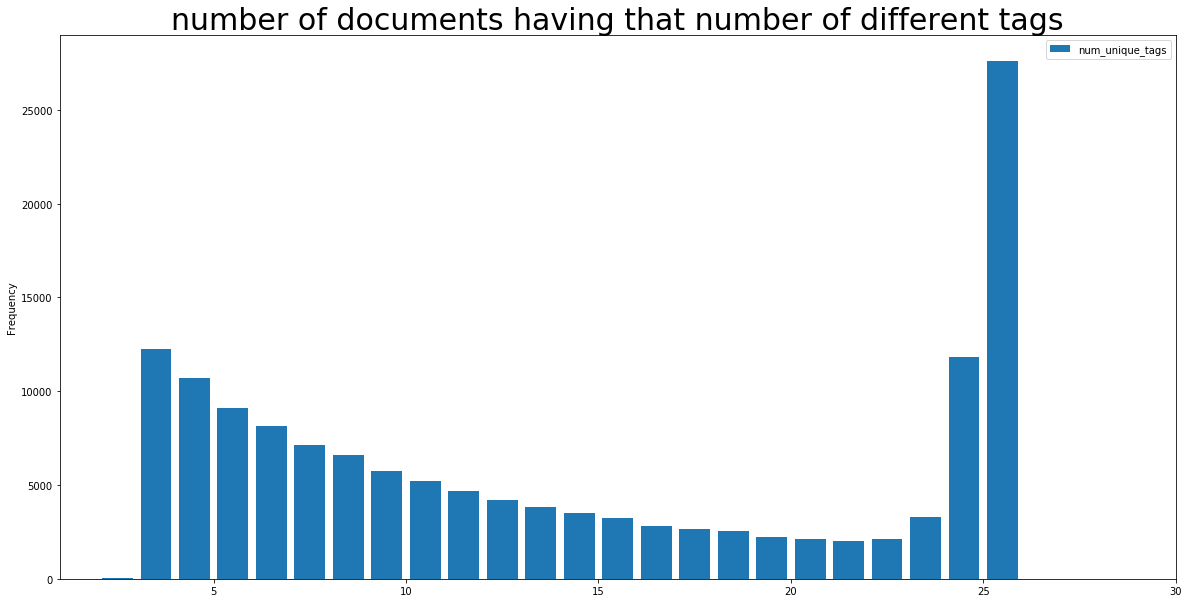

In [12]:
docs_df[['num_unique_tags']].plot(kind='hist',bins=np.arange(1.0,30,1),rwidth=0.8)

plt.gcf().set_size_inches(20,10)
plt.gca().set_title('number of documents having that number of different tags',fontsize=30)
plt.gca().set_xlim(1,30)

(1, 150)

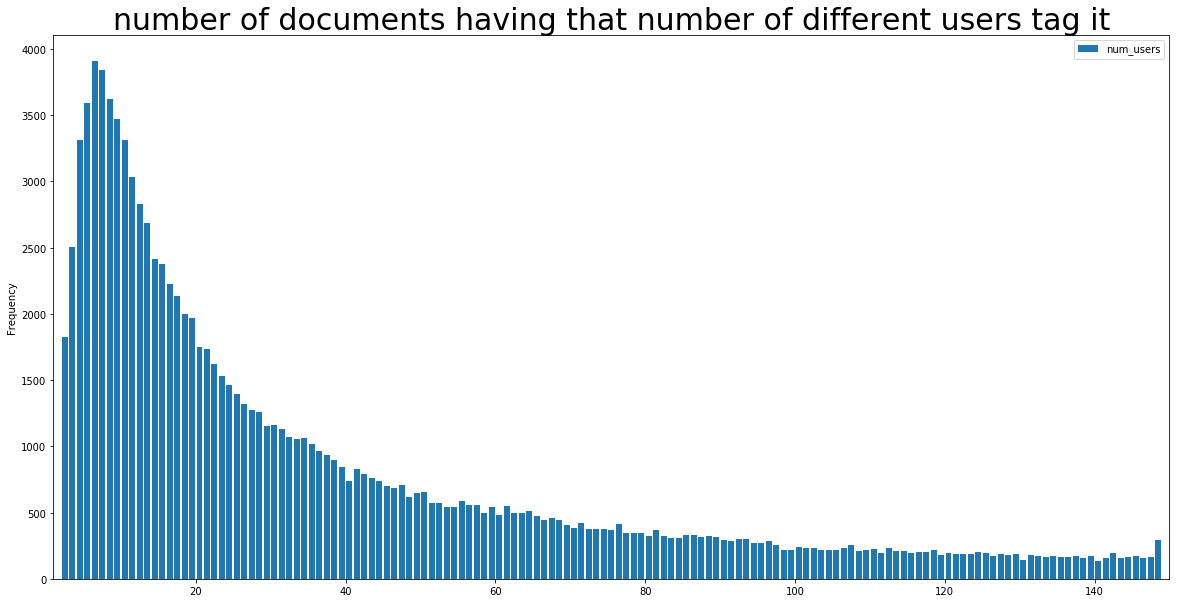

In [13]:
docs_df[['num_users']].plot(kind='hist',bins=np.arange(1.0,150,1),rwidth=0.8)
plt.gcf().set_size_inches(20,10)
plt.gca().set_title('number of documents having that number of different users tag it',fontsize=30)
plt.gca().set_xlim(1,150)

In [14]:
tagsets = [tagset.split(',') for tagset in docs_df["unique_tags"].values]

flat_list = []

for tagset in tagsets:
    for tag in tagset:
        flat_list.append(tag)
        
flat_set = set(flat_list)

## number of unique tags

In [16]:
len(flat_set)

63474

## number of times each tag was given to a document

(not counting multiple assignments)

In [18]:
labelsets = [tagset.split(',') for tagset in docs_df["unique_tags"].values]

In [25]:
tag_counts = MultiLabelBinarizer(sparse_output=True).fit_transform(labelsets).sum(axis=0)

In [41]:
tag_counts = tag_counts.astype('uint8')
tag_counts = np.array(tag_counts).ravel()

Text(20,6000,'$\\mu=9.14,\\ \\sigma=27.31$')

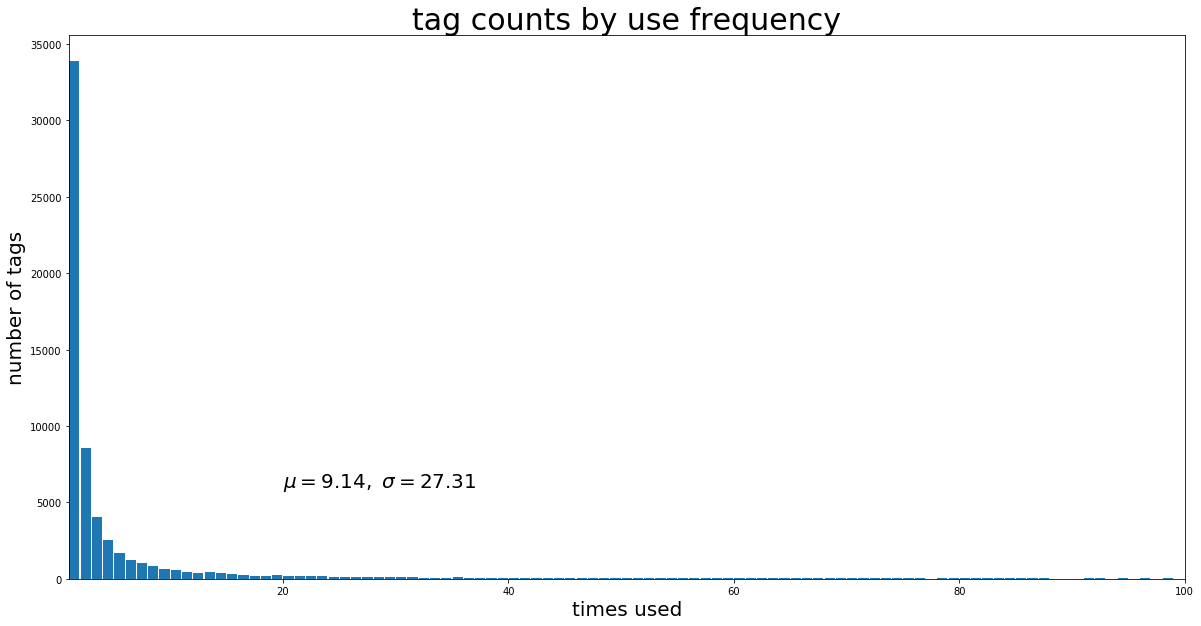

In [39]:
plt.hist(,bins=np.arange(1.0,100,1),rwidth=0.9)

plt.gcf().set_size_inches(20,10)
plt.gca().set_title('tag counts by use frequency',fontsize=30)
plt.gca().set_xlim(1,100)
plt.xlabel('times used',fontsize=20)
plt.ylabel('number of tags', fontsize=20)
plt.text(20,6000,r'$\mu={0:.2f},\ \sigma={1:.2f}$'.format(tag_counts.mean(), tag_counts.std()), fontsize=20)